In [ ]:
import sys
sys.executable

In [41]:
! pip install sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
df = pd.read_csv("Data-Collisions.csv")

In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [6]:
df.isna().sum().sort_values(ascending = False)

PEDROWNOTGRNT     190006
EXCEPTRSNDESC     189035
SPEEDING          185340
INATTENTIONIND    164868
INTKEY            129603
EXCEPTRSNCODE     109862
SDOTCOLNUM         79737
JUNCTIONTYPE        6329
Y                   5334
X                   5334
LIGHTCOND           5170
WEATHER             5081
ROADCOND            5012
ST_COLDESC          4904
COLLISIONTYPE       4904
UNDERINFL           4884
LOCATION            2677
ADDRTYPE            1926
ST_COLCODE            18
INCKEY                 0
STATUS                 0
REPORTNO               0
COLDETKEY              0
OBJECTID               0
HITPARKEDCAR           0
PEDCYLCOUNT            0
SEVERITYCODE.1         0
SEVERITYDESC           0
PERSONCOUNT            0
PEDCOUNT               0
CROSSWALKKEY           0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
SDOT_COLCODE           0
SDOT_COLDESC           0
SEGLANEKEY             0
SEVERITYCODE           0
dtype: int64

The WEATHER field contains a description of the weather conditions during the time of the collision.

In [7]:
df['WEATHER'].value_counts().to_frame('count')

,count
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


The ROADCOND field describes the condition of the road during the collision.

In [8]:
df['ROADCOND'].value_counts().to_frame('count')

,count
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


The LIGHTCOND field describes the light conditions during the collision.

In [9]:
df['LIGHTCOND'].value_counts().to_frame('count')

,count
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


The SPEEDING field classifies collisions based on whether or not speeding was a factor in the collision. Blanks indicate cases where the vehicle was not speeding.

In [10]:
df['SPEEDING'].value_counts().to_frame()

,SPEEDING
Y,9333


The UNDERINFL field describes whether or not a driver involved was under the influence of drugs or alcohol. The values 0 and N denote that the driver was not under any influence while 1 and Y that they were.

In [11]:
df['UNDERINFL'].value_counts().to_frame('count')

,count
N,100274
0,80394
Y,5126
1,3995


The PERSONCOUNT and VEHCOUNT indicate how many people and vehicles were involved in a collision respectively.

In [12]:
df['PERSONCOUNT'].describe()

count    194673.000000
mean          2.444427
std           1.345929
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          81.000000
Name: PERSONCOUNT, dtype: float64

In [13]:
df['VEHCOUNT'].describe()

count    194673.000000
mean          1.920780
std           0.631047
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          12.000000
Name: VEHCOUNT, dtype: float64

In [14]:
df['PEDCOUNT'].describe()

count    194673.000000
mean          0.037139
std           0.198150
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: PEDCOUNT, dtype: float64

In [15]:
df['PEDCYLCOUNT'].describe()

count    194673.000000
mean          0.028391
std           0.167413
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: PEDCYLCOUNT, dtype: float64

The SEVERITYCODE field contains a code that corresponds to the severity of the collision. and SEVERITYDESC contains a detailed description of the severity of the collision.

In [16]:
df['SEVERITYCODE'].value_counts().to_frame('count')

,count
1,136485
2,58188


As you can see, the number of rows in class 1 is almost three times bigger than the number of rows in class 2. It is possible to solve the issue by downsampling the class 1.

In [17]:
from sklearn.utils import resample

In [18]:
df_maj = df[df.SEVERITYCODE == 1]
df_min = df[df.SEVERITYCODE == 2]

df_maj_dsample = resample(df_maj, replace = False, n_samples = 58188, random_state = 123)

balanced_df = pd.concat([df_maj_dsample, df_min])

balanced_df.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [19]:
balanced_df.shape

(116376, 38)

In [20]:
df_clean = balanced_df[['WEATHER', 'ROADCOND', 'LIGHTCOND',
                   'SPEEDING', 'SEVERITYCODE', 'UNDERINFL',
                   'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116376 entries, 25055 to 194671
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   WEATHER       113560 non-null  object
 1   ROADCOND      113612 non-null  object
 2   LIGHTCOND     113528 non-null  object
 3   SPEEDING      5980 non-null    object
 4   SEVERITYCODE  116376 non-null  int64 
 5   UNDERINFL     113683 non-null  object
 6   PERSONCOUNT   116376 non-null  int64 
 7   PEDCOUNT      116376 non-null  int64 
 8   PEDCYLCOUNT   116376 non-null  int64 
 9   VEHCOUNT      116376 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 7.5+ MB


In [21]:
df_clean.SPEEDING.unique()

array([nan, 'Y'], dtype=object)

Fixing the SPEEDING field by encoding it to 0 for the blanks and 1 for the Y values.

In [22]:
df_clean['SPEEDING'] = df_clean['SPEEDING'].map({'Y': 1})
df_clean['SPEEDING'].replace(np.nan, 0, inplace=True)
df_clean['SPEEDING'].value_counts().to_frame()

,SPEEDING
0.0,110396
1.0,5980


In [23]:
df_clean.SEVERITYCODE.unique()

array([1, 2], dtype=int64)

In [24]:
df_clean.isna().sum()

WEATHER         2816
ROADCOND        2764
LIGHTCOND       2848
SPEEDING           0
SEVERITYCODE       0
UNDERINFL       2693
PERSONCOUNT        0
PEDCOUNT           0
PEDCYLCOUNT        0
VEHCOUNT           0
dtype: int64

In [25]:
df_clean.dropna(axis=0, inplace=True)

In [26]:
df_clean.shape

(113430, 10)

Now, we have clean data as we have discarded the null values and it is a balanced dataset. Further, we can start creating our prediction model.

In [27]:
df_clean.isna().sum()

WEATHER         0
ROADCOND        0
LIGHTCOND       0
SPEEDING        0
SEVERITYCODE    0
UNDERINFL       0
PERSONCOUNT     0
PEDCOUNT        0
PEDCYLCOUNT     0
VEHCOUNT        0
dtype: int64

In [28]:
df_clean.UNDERINFL.unique()

array(['0', 'N', 'Y', '1'], dtype=object)

In [29]:
df_clean.UNDERINFL.replace({'N':0, 'Y':1, '0': 0, '1': 1}, inplace = True)

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113430 entries, 25055 to 194671
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   WEATHER       113430 non-null  object 
 1   ROADCOND      113430 non-null  object 
 2   LIGHTCOND     113430 non-null  object 
 3   SPEEDING      113430 non-null  float64
 4   SEVERITYCODE  113430 non-null  int64  
 5   UNDERINFL     113430 non-null  int64  
 6   PERSONCOUNT   113430 non-null  int64  
 7   PEDCOUNT      113430 non-null  int64  
 8   PEDCYLCOUNT   113430 non-null  int64  
 9   VEHCOUNT      113430 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 8.2+ MB


We now do an one-hot encoding of the WEATHER, ROADCOND, and LIGHTCOND fields as they are categorical.

In [32]:
df_clean = pd.concat([df_clean.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis=1), 
           pd.get_dummies(df_clean['ROADCOND']),
           pd.get_dummies(df_clean['LIGHTCOND']),
           pd.get_dummies(df_clean['WEATHER'])], axis=1)

In [33]:
df_clean.shape

(113430, 36)

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. Finding the correlation among the features of the dataset helps understand the data better. For example, in the heatmap shown below, it can be observed that some features have a strong positive / negative correlation while most of them have weak / no correlation.

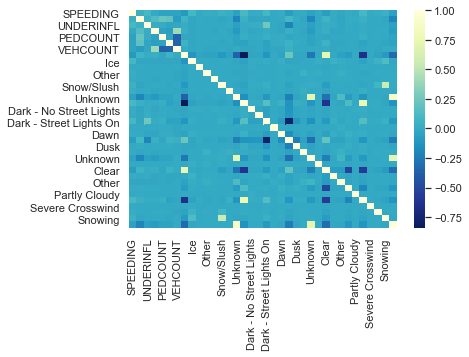

In [34]:
sns.heatmap(df_clean.corr(), cmap='YlGnBu_r')
plt.show()

Let us perform the scaling of the data.

In [36]:
from sklearn import preprocessing
df_clean_X = df_clean.drop(['SEVERITYCODE'], axis=1)
df_clean_Y = df_clean[['SEVERITYCODE']]

x = np.asarray(df_clean_X)
y = np.asarray(df_clean_Y)

#x = np.asarray(df_clean.drop(['SEVERITYCODE'], axis=1))
#y = np.asarray(df_clean[['SEVERITYCODE']])
df_clean_scaled = preprocessing.StandardScaler().fit(x).transform(x)
df_clean_scaled[0:3]

array([[-0.23574393, -0.23570226, -0.37719647, -0.24058649, -0.21530772,
         0.08224077, -1.42153871, -0.07742966, -0.01854569, -0.02706039,
        -0.02035987, -0.06825559, -0.02242243, -0.25221484,  1.69302   ,
        -0.08771204, -0.0787439 ,  1.70272667, -0.00785595, -0.1171248 ,
        -1.3050764 , -0.18065685, -0.03347967, -0.23740606, -0.016265  ,
        -1.22072759, -0.05603132, -0.05948852, -0.41728451, -0.00593846,
         2.1249503 , -0.01070613, -0.02357366, -0.06450399, -0.25308364],
       [-0.23574393, -0.23570226, -0.37719647, -0.24058649, -0.21530772,
         0.08224077,  0.70346308, -0.07742966, -0.01854569, -0.02706039,
        -0.02035987, -0.06825559, -0.02242243, -0.25221484, -0.59066048,
        -0.08771204, -0.0787439 , -0.58729332, -0.00785595, -0.1171248 ,
         0.76623866, -0.18065685, -0.03347967, -0.23740606, -0.016265  ,
         0.81918358, -0.05603132, -0.05948852, -0.41728451, -0.00593846,
        -0.47059924, -0.01070613, -0.02357366, -0.

The datasets x and y are constructed. The set x contains all the training examples and y contains all the labels. Feature scaling of data is done to normalize the data in a dataset to a specific range.

After normalization, they are split into x_train, y_train, x_test, and y_test. The first two sets sahll be used for training and the last two shall be used for testing. Upon choosing a suitable split ratio, 70% of data is used for training and 30% of is used for testing.

In [38]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_clean_scaled, y, 
                                                    test_size=0.3, random_state=42)

# Modelling and Evaluation

In [40]:
print("Train Set:", x_train.shape, y_train.shape)
print("Test Set:", x_test.shape, y_test.shape)

Train Set: (79401, 35) (79401, 1)
Test Set: (34029, 35) (34029, 1)


## 1. KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

k = 25
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(x_train, y_train)
yhat_knn = neigh.predict(x_test)

In [46]:
yhat_knn[0:5]

array([2, 1, 1, 2, 1], dtype=int64)

## 2. Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
print(tree)
tree.fit(x_train, y_train)
yhat_dt = tree.predict(x_test)

yhat_dt[0:5]

DecisionTreeClassifier(criterion='entropy', max_depth=7)


array([2, 1, 1, 1, 1], dtype=int64)

## 3. Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C = 6, solver= 'liblinear')
LR.fit(x_train, y_train)
print(LR)

yhat_lr = LR.predict(x_test)
yhat_lr[0:5]


LogisticRegression(C=6, solver='liblinear')


array([2, 1, 1, 1, 1], dtype=int64)

# Model Evaluation

In [54]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## 1. KNN

In [55]:
## jaccard similarity score
jaccard_score(y_test, yhat_knn)

0.5057616283959963

In [56]:
## F1-Score
f1_score(y_test, yhat_knn, average = 'macro')

0.6537053041937668

## 2. Decision Tree

In [57]:
## jaccard similarity score
jaccard_score(y_test, yhat_dt)

0.5244533466866967

In [58]:
## f1-score
f1_score(y_test, yhat_dt, average = 'macro')

0.6632874473671201

## 3. Logistic Regression

In [59]:
## jaccard similarity score
jaccard_score(y_test, yhat_lr)

0.5240416391275612

In [60]:
## f1-score
f1_score(y_test, yhat_lr, average = 'macro')

0.658989211753582

In [61]:
## log_loss
yhat_prob = LR.predict_proba(x_test)
log_loss(y_test, yhat_prob)

0.5961970555333643